In [10]:
%matplotlib inline

In [11]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
from sklearn.model_selection import train_test_split
X_train0, X_test0, y_train0, y_test0 = train_test_split(faces.images, faces.target, test_size=0.4, random_state=0)
X_train = X_train0[:, :, :, np.newaxis]
X_test = X_test0[:, :, :, np.newaxis]
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0, 40)
X_train.shape, Y_train.shape

((240, 64, 64, 1), (240, 40))

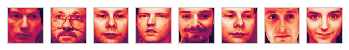

In [14]:
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(X_train[i, :, :, 0])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

In [28]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [29]:
test_generator = ImageDataGenerator()
train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))
test_iterator =  test_generator.flow(X_test, Y_test, batch_size=len(X_test))

N = 5
X_train_new = []
Y_train_new = []
X_test_new = []
Y_test_new = []
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)
    x_test_new, y_test_new = test_iterator.next()
    X_test_new.append(x_test_new)
    Y_test_new.append(y_test_new)

In [30]:
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)
X_test_new = np.vstack(X_test_new)
Y_test_new = np.vstack(Y_test_new)

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import *
from keras.regularizers import l2

In [32]:
np.random.seed(0)
 
model = Sequential()

model.add(Conv2D(20, (5, 5), activation='relu', input_shape=(64, 64, 1),
                 padding="same", kernel_initializer="glorot_normal", kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())

model.add(Dropout(0.4))
model.add(Conv2D(50, (5, 5), activation='relu', 
                 padding="same", kernel_initializer="glorot_normal", kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(500, activation='relu',
                kernel_initializer="glorot_normal", kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

model.add(Dense(40, activation='softmax',
                kernel_initializer="glorot_normal", kernel_regularizer=l2(0.001)))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 20)        520       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 50)        25050     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
__________

In [34]:
%%time
hist1 = model.fit(X_train, Y_train,
                  epochs=100, batch_size=20,
                  validation_data=(X_test, Y_test),
                  verbose=1)

Train on 240 samples, validate on 160 samples
Epoch 1/100
240/240 [==============================] - 6s 23ms/step - loss: 4.6238 - acc: 0.0125 - val_loss: 4.4912 - val_acc: 0.0063
Epoch 2/100
240/240 [==============================] - 4s 17ms/step - loss: 4.4639 - acc: 0.0458 - val_loss: 4.4656 - val_acc: 0.0063
Epoch 3/100
240/240 [==============================] - 4s 18ms/step - loss: 4.4376 - acc: 0.0375 - val_loss: 4.4367 - val_acc: 0.0063
Epoch 4/100
240/240 [==============================] - 5s 19ms/step - loss: 4.3992 - acc: 0.0417 - val_loss: 4.4080 - val_acc: 0.0188
Epoch 5/100
240/240 [==============================] - 4s 18ms/step - loss: 4.3544 - acc: 0.0458 - val_loss: 4.3814 - val_acc: 0.0063
Epoch 6/100
240/240 [==============================] - 4s 17ms/step - loss: 4.3032 - acc: 0.0542 - val_loss: 4.3449 - val_acc: 0.0250
Epoch 7/100
240/240 [==============================] - 4s 17ms/step - loss: 4.2271 - acc: 0.0958 - val_loss: 4.2731 - val_acc: 0.0438
Epoch 8/100
240/

240/240 [==============================] - 4s 17ms/step - loss: 0.2418 - acc: 1.0000 - val_loss: 0.5942 - val_acc: 0.8938
Epoch 62/100
240/240 [==============================] - 4s 17ms/step - loss: 0.2766 - acc: 0.9833 - val_loss: 0.6283 - val_acc: 0.8813
Epoch 63/100
240/240 [==============================] - 4s 17ms/step - loss: 0.2438 - acc: 1.0000 - val_loss: 0.5788 - val_acc: 0.9125
Epoch 64/100
240/240 [==============================] - 4s 17ms/step - loss: 0.2520 - acc: 0.9875 - val_loss: 0.5617 - val_acc: 0.9250
Epoch 65/100
240/240 [==============================] - 4s 17ms/step - loss: 0.2440 - acc: 1.0000 - val_loss: 0.5735 - val_acc: 0.8813
Epoch 66/100
240/240 [==============================] - 4s 17ms/step - loss: 0.2432 - acc: 0.9958 - val_loss: 0.5565 - val_acc: 0.8938
Epoch 67/100
240/240 [==============================] - 4s 17ms/step - loss: 0.2641 - acc: 0.9792 - val_loss: 0.5700 - val_acc: 0.9250
Epoch 68/100
240/240 [==============================] - 4s 18ms/step

In [35]:
%%time
hist2 = model.fit(X_train_new, Y_train_new,
                  epochs=100, batch_size=20,
                  validation_data=(X_test, Y_test),
                  verbose=1)

Train on 1200 samples, validate on 160 samples
Epoch 1/100
1200/1200 [==============================] - 18s 15ms/step - loss: 2.4543 - acc: 0.4167 - val_loss: 0.8238 - val_acc: 0.8563
Epoch 2/100
1200/1200 [==============================] - 20s 17ms/step - loss: 1.4571 - acc: 0.6392 - val_loss: 0.7178 - val_acc: 0.8875
Epoch 3/100
1200/1200 [==============================] - 18s 15ms/step - loss: 1.0506 - acc: 0.7700 - val_loss: 0.7539 - val_acc: 0.8563
Epoch 4/100
1200/1200 [==============================] - 18s 15ms/step - loss: 0.8537 - acc: 0.8317 - val_loss: 0.5551 - val_acc: 0.9375
Epoch 5/100
1200/1200 [==============================] - 18s 15ms/step - loss: 0.6640 - acc: 0.9017 - val_loss: 0.6885 - val_acc: 0.9187
Epoch 6/100
1200/1200 [==============================] - 21s 17ms/step - loss: 0.5713 - acc: 0.9258 - val_loss: 0.6366 - val_acc: 0.9437
Epoch 7/100
1200/1200 [==============================] - 21s 17ms/step - loss: 0.5804 - acc: 0.9367 - val_loss: 0.6001 - val_acc: 0

1200/1200 [==============================] - 19s 16ms/step - loss: 0.3332 - acc: 0.9783 - val_loss: 0.5428 - val_acc: 0.9250
Epoch 61/100
1200/1200 [==============================] - 18s 15ms/step - loss: 0.3061 - acc: 0.9900 - val_loss: 0.5826 - val_acc: 0.9312
Epoch 62/100
1200/1200 [==============================] - 18s 15ms/step - loss: 0.3044 - acc: 0.9900 - val_loss: 0.4943 - val_acc: 0.9375
Epoch 63/100
1200/1200 [==============================] - 18s 15ms/step - loss: 0.3406 - acc: 0.9750 - val_loss: 0.5567 - val_acc: 0.9312
Epoch 64/100
1200/1200 [==============================] - 18s 15ms/step - loss: 0.3061 - acc: 0.9875 - val_loss: 0.6132 - val_acc: 0.9125
Epoch 65/100
1200/1200 [==============================] - 18s 15ms/step - loss: 0.3337 - acc: 0.9792 - val_loss: 0.4930 - val_acc: 0.9250
Epoch 66/100
1200/1200 [==============================] - 18s 15ms/step - loss: 0.3030 - acc: 0.9917 - val_loss: 0.5512 - val_acc: 0.9187
Epoch 67/100
1200/1200 [=======================

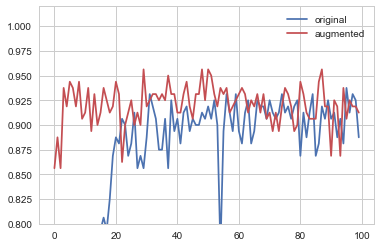

In [36]:
plt.plot(hist1.history['val_acc'], 'b', label="original")
plt.plot(hist2.history['val_acc'], 'r', label="augmented")
plt.ylim(0.8, 1.02)
plt.legend()
plt.show()